In [15]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import itertools

In [2]:
data_df = pd.read_csv('data.csv')
#to make it faster I am working only with the numbers
data_df = data_df[72000:]

In [3]:
#separating features from label
X_df = data_df.drop(['character'], axis=1)
#scaling the features by dividing it by 2555
X_df = X_df/255
#converting X to matrix form 
X = X_df.as_matrix()

With the MNIST dataset it was pretty easy to encode the digits but here since it was a string of labels I had to make amendments

In [4]:

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data_df['character'])
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

[0 0 0 ... 9 9 9]


In [5]:
#Splitting the data into training and testing 
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=123, test_size=0.3)

In [6]:
#fitting ANN with three layers and 250 nodes each (300 didnt give any increased accurary and increased computation time by 50%)
model = Sequential()
early_stopping = EarlyStopping(patience=2)
model.add(Dense(250, activation = 'relu', input_shape=(1024,)))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer ='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,validation_split=0.3, callbacks=[early_stopping], epochs=40)


Train on 9800 samples, validate on 4200 samples
Epoch 1/40
9800/9800 [==============================] - 4s 437us/step - loss: 1.1323 - acc: 0.7193 - val_loss: 0.4917 - val_acc: 0.8731
Epoch 2/40
9800/9800 [==============================] - 3s 343us/step - loss: 0.3738 - acc: 0.8986 - val_loss: 0.3249 - val_acc: 0.9048
Epoch 3/40
9800/9800 [==============================] - 3s 350us/step - loss: 0.2590 - acc: 0.9278 - val_loss: 0.2760 - val_acc: 0.9119
Epoch 4/40
9800/9800 [==============================] - 4s 379us/step - loss: 0.2050 - acc: 0.9449 - val_loss: 0.2472 - val_acc: 0.9264
Epoch 5/40
9800/9800 [==============================] - 3s 354us/step - loss: 0.1732 - acc: 0.9538 - val_loss: 0.1870 - val_acc: 0.9440
Epoch 6/40
9800/9800 [==============================] - 4s 376us/step - loss: 0.1511 - acc: 0.9569 - val_loss: 0.1849 - val_acc: 0.9474
Epoch 7/40
9800/9800 [==============================] - 4s 370us/step - loss: 0.1342 - acc: 0.9650 - val_loss: 0.1730 - val_acc: 0.9524


In [7]:
model.evaluate(X_test,y_test)

6000/6000 [==============================] - 1s 124us/step


[0.11665443541606267, 0.9646666666666667]

In [8]:
#startin for CNN
X = X_df.values.reshape(-1,32,32,1)

In [9]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=123, test_size=0.3)

In [10]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#since it was becoming computationally expensive i am running just one layer with 100 nodes in the hidden layer
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer ='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_test,y_test], callbacks=[early_stopping], epochs=50)

Train on 14000 samples, validate on 6000 samples
Epoch 1/50
14000/14000 [==============================] - 100s 7ms/step - loss: 0.9622 - acc: 0.6743 - val_loss: 0.2603 - val_acc: 0.9193
Epoch 2/50
14000/14000 [==============================] - 129s 9ms/step - loss: 0.3953 - acc: 0.8689 - val_loss: 0.1792 - val_acc: 0.9458
Epoch 3/50
14000/14000 [==============================] - 132s 9ms/step - loss: 0.2860 - acc: 0.9061 - val_loss: 0.1350 - val_acc: 0.9572
Epoch 4/50
14000/14000 [==============================] - 95s 7ms/step - loss: 0.2351 - acc: 0.9239 - val_loss: 0.1111 - val_acc: 0.9658
Epoch 5/50
14000/14000 [==============================] - 89s 6ms/step - loss: 0.1898 - acc: 0.9373 - val_loss: 0.1061 - val_acc: 0.9670
Epoch 6/50
14000/14000 [==============================] - 108s 8ms/step - loss: 0.1648 - acc: 0.9479 - val_loss: 0.0830 - val_acc: 0.9748
Epoch 7/50
14000/14000 [==============================] - 96s 7ms/step - loss: 0.1482 - acc: 0.9542 - val_loss: 0.0807 - val_

In [11]:
#using it on the testing model
y_pred = model.predict(X_test)


In [ ]:
y_pred_classes = []
for x in y_pred:
    inverted = label_encoder.inverse_transform([argmax(x)])
    y_pred_classes.append(inverted)

In [13]:
#getting an overall accuracy of 97.48% with just basic neural network seem really good. With multiple hidden layer
#it could be nudged to 97-98 I am a sure
model.evaluate(X_test, y_test, verbose=0)


[0.04830487777742868, 0.9846666666666667]

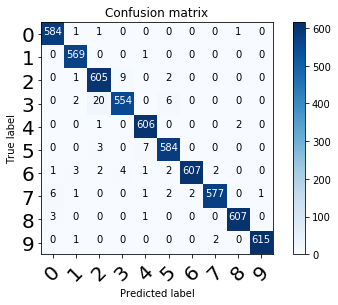

In [16]:
#I have taken this from another kernel by Yassine Ghouzam who has done an amazing job on digit recognizer (mnist dataset) check it out
# https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plt.clf()
plot_confusion_matrix(confusion_mtx, classes = range(10)) 
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()